In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
data=pd.read_csv('train.txt',sep=';', names=['text','emotion'])

In [ ]:
data.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
data.shape

(16000, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [ ]:
data.duplicated().sum()

np.int64(1)

In [ ]:
data.isnull().sum()

,0
text,0
emotion,0


<Axes: xlabel='emotion', ylabel='count'>

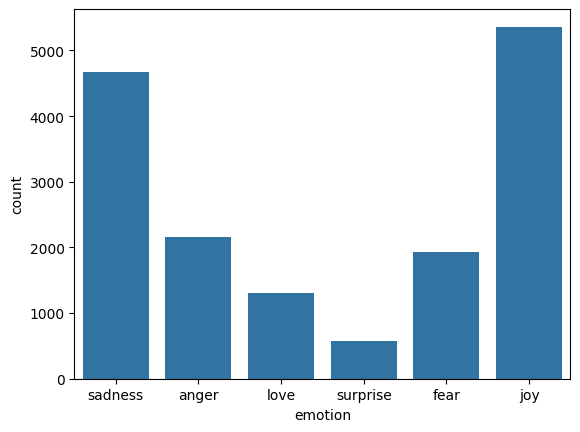

In [ ]:
sns.countplot(x=data['emotion'])

In [ ]:
#preprocess data
data['text']=data['text'].apply(lambda x:x.lower())

In [ ]:
import string
def remove_punctuations(text):
  cleaned=''
  for i in text:
    if i not in string.punctuation:
      cleaned += i
  return cleaned


data['text']=data['text'].apply(remove_punctuations)


In [ ]:
data['text']

,text
0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy
...,...
15995,i just had a very brief time in the beanbag an...
15996,i am now turning and i feel pathetic that i am...
15997,i feel strong and good overall
15998,i feel like this was such a rude comment and i...


In [ ]:

def remove_numbers(text):
  cleaned=''
  for i in text:
    if not i.isdigit():
      cleaned +=i
  return cleaned

data['text']=data['text'].apply(remove_numbers)

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords=set(stopwords.words('english'))

In [ ]:
def tokenize(text):
  tokens=text.split()
  cleaned_tokens=[]
  for i in tokens:
    if i not in stopwords:
      cleaned_tokens.append(i)

  return ' '.join(cleaned_tokens)

data['text']=data['text'].apply(tokenize)

In [ ]:
data

,text,emotion
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger
...,...,...
15995,brief time beanbag said anna feel like beaten,sadness
15996,turning feel pathetic still waiting tables sub...,sadness
15997,feel strong good overall,joy
15998,feel like rude comment im glad,anger


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

import spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_sm")
# doc=nlp("Hey my name is fizza im currently studying computer science")
# print(doc)
# for token in doc:
#   print(token.text," -> ",token.lemma_)

def lemmatize(text):
  doc=nlp(text)
  lemmatized=[]

  for token in doc:
    if not token.is_stop and token.is_alpha:
      lemmatized.append(token.lemma_)

  return ' '.join(lemmatized)

data['text']=data['text'].apply(lemmatize)

In [ ]:
encoder=LabelEncoder()
data['emotion']=encoder.fit_transform(data['emotion'])

In [ ]:
data

,text,emotion
0,not feel humiliated,4
1,feel hopeless damned hopeful care awake,4
2,m grab minute post feel greedy wrong,0
3,feel nostalgic fireplace know property,3
4,feel grouchy,0
...,...,...
15995,brief time beanbag say anna feel like beat,4
15996,turn feel pathetic wait table sub teaching degree,4
15997,feel strong good overall,2
15998,feel like rude comment m glad,0


In [ ]:
data['no of words']=data['text'].apply(lambda x:len(x.split()))

<Axes: xlabel='no of words', ylabel='Count'>

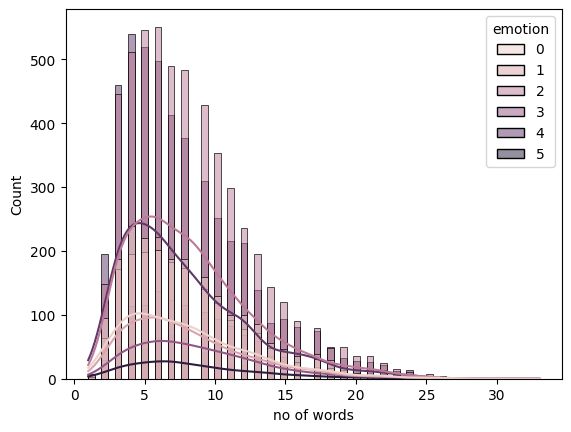

In [ ]:
sns.histplot(x=data['no of words'], kde=True, hue=data['emotion'])

In [ ]:
tfidf=TfidfVectorizer(ngram_range=(1,2))

In [ ]:
X=data['text']
y=data['emotion']

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.2, random_state=42)

In [ ]:
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [ ]:
X_train_tfidf.shape

(12800, 73833)

In [ ]:
LogisticRegression= LogisticRegression()
LogisticRegression.fit(X_train_tfidf, y_train)
y_pred_logistic=LogisticRegression.predict(X_test_tfidf)

Classification Report  : 
               precision    recall  f1-score   support

           0       0.91      0.77      0.83       427
           1       0.87      0.72      0.79       397
           2       0.78      0.96      0.86      1021
           3       0.89      0.53      0.67       296
           4       0.87      0.94      0.90       946
           5       0.83      0.39      0.53       113

    accuracy                           0.84      3200
   macro avg       0.86      0.72      0.76      3200
weighted avg       0.85      0.84      0.83      3200

Accuracy score :  0.8403125


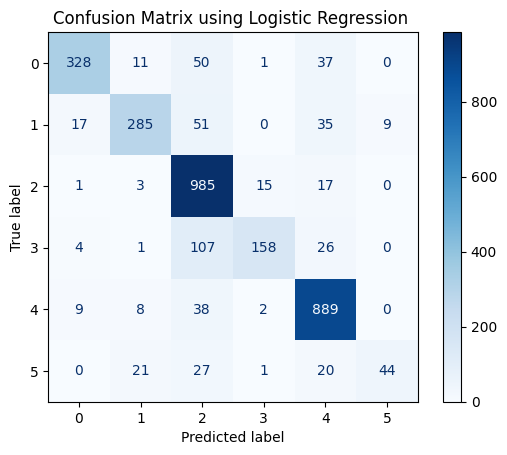

<Figure size 600x400 with 0 Axes>

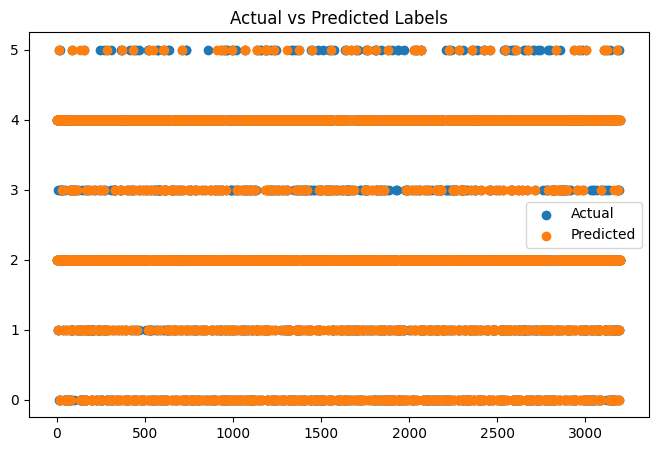

In [ ]:
print("Classification Report  : \n",classification_report(y_test,y_pred_logistic))
print("Accuracy score : ",accuracy_score(y_test,y_pred_logistic))

cm=confusion_matrix(y_test,y_pred_logistic)
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix using Logistic Regression ")
plt.show()

plt.figure(figsize=(6,4))

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred_logistic)),y_pred_logistic, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Labels")
plt.show()



In [ ]:
naive_bayes=MultinomialNB()
naive_bayes.fit(X_train_tfidf,y_train)
y_pred_bayes=naive_bayes.predict(X_test_tfidf)

Classification Report  : 
               precision    recall  f1-score   support

           0       0.93      0.32      0.48       427
           1       0.94      0.27      0.42       397
           2       0.58      0.99      0.73      1021
           3       1.00      0.06      0.11       296
           4       0.75      0.92      0.82       946
           5       1.00      0.01      0.02       113

    accuracy                           0.67      3200
   macro avg       0.87      0.43      0.43      3200
weighted avg       0.77      0.67      0.60      3200

Accuracy score :  0.670625


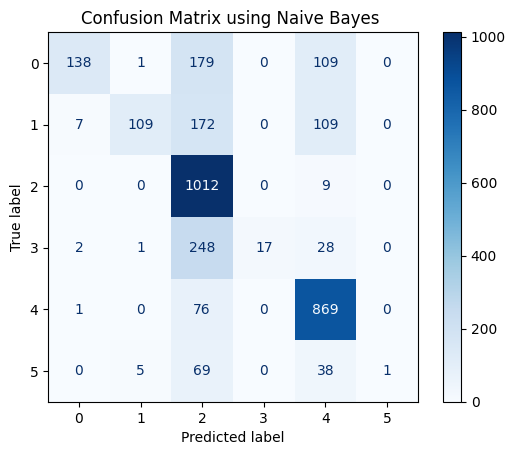

<Figure size 600x400 with 0 Axes>

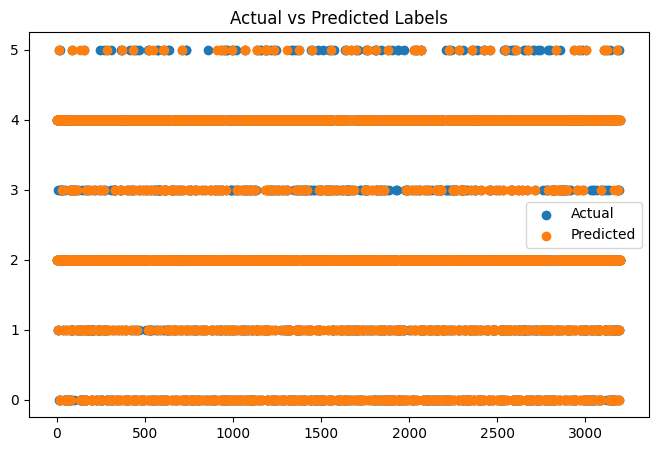

In [ ]:
print("Classification Report  : \n",classification_report(y_test,y_pred_bayes))
print("Accuracy score : ",accuracy_score(y_test,y_pred_bayes))

cm=confusion_matrix(y_test,y_pred_bayes)
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix using Naive Bayes ")
plt.show()

plt.figure(figsize=(6,4))

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred_bayes)),y_pred_logistic, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Labels")
plt.show()



In [ ]:
SVM=LinearSVC()
SVM.fit(X_train_tfidf,y_train)
y_pred_svm=SVM.predict(X_test_tfidf)

Classification Report  : 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       427
           1       0.88      0.83      0.85       397
           2       0.88      0.94      0.91      1021
           3       0.84      0.72      0.77       296
           4       0.91      0.93      0.92       946
           5       0.82      0.70      0.76       113

    accuracy                           0.89      3200
   macro avg       0.87      0.83      0.85      3200
weighted avg       0.89      0.89      0.89      3200

Accuracy score :  0.8884375


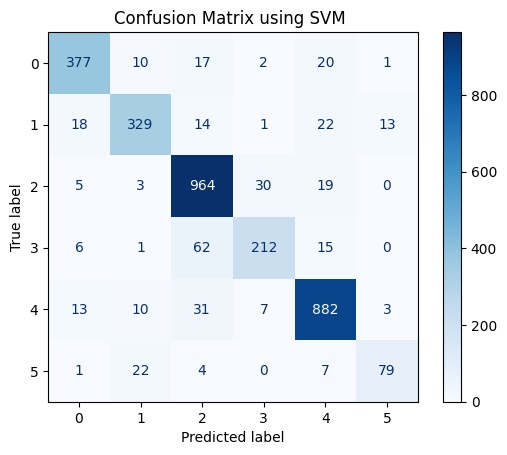

<Figure size 600x400 with 0 Axes>

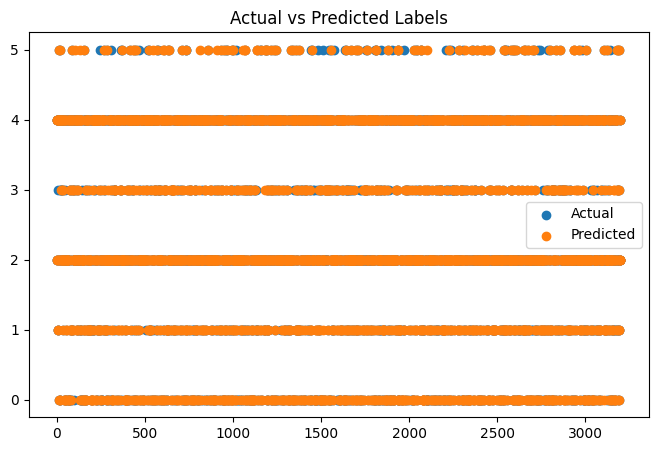

In [ ]:
print("Classification Report  : \n",classification_report(y_test,y_pred_svm))
print("Accuracy score : ",accuracy_score(y_test,y_pred_svm))

cm=confusion_matrix(y_test,y_pred_svm)
disp=ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix using SVM ")
plt.show()

plt.figure(figsize=(6,4))

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label="Actual")
plt.scatter(range(len(y_pred_svm)),y_pred_svm, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Labels")
plt.show()



In [ ]:
!pip install tensorflow
import tensorflow as tf


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, Input, Embedding, SimpleRNN

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [ ]:
ANN=Sequential([
    Input(shape=(X_train_tfidf.shape[1],)),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(8, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])
ANN.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])
ANN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 16)             │     1,181,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,181,534 (4.51 MB)

 Trainable params: 1,181,534 (4.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ANN.fit(X_train_tfidf ,y_train_cat , epochs=20, verbose=1, validation_split=0.25 ,batch_size=122 )

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 173ms/step - accuracy: 0.3326 - loss: 1.7712 - val_accuracy: 0.4259 - val_loss: 1.6830
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.4424 - loss: 1.6268 - val_accuracy: 0.5191 - val_loss: 1.5046
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.5209 - loss: 1.4095 - val_accuracy: 0.5816 - val_loss: 1.2950
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6050 - loss: 1.1064 - val_accuracy: 0.6084 - val_loss: 1.0986
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - accuracy: 0.6718 - loss: 0.8842 - val_accuracy: 0.6712 - val_loss: 0.9490
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.7723 - loss: 0.6942 - val_accuracy: 0.7497 - val_loss: 0.8348
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - accuracy: 0.8153 - loss: 0.5935 - val_accuracy: 0.7900 - val_loss: 0.7452
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.8499 - loss: 0.4881 - val_accuracy: 0.8087

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer()

In [ ]:
X_train_embedded, X_test_embedded, y_train_embedded , y_test_embedded=train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
tokenizer.fit_on_texts(X_train_embedded)

In [ ]:
len(tokenizer.word_index)

10706

In [ ]:
tokenizer.word_counts

OrderedDict([('refer', 11),
             ('course', 43),
             ('not', 1257),
             ('help', 259),
             ('feel', 12827),
             ('ironically', 1),
             ('retrospect', 3),
             ('loudon', 1),
             ('son', 30),
             ('kate', 1),
             ('mcgarrigle', 1),
             ('talented', 38),
             ('rufus', 1),
             ('wainwright', 1),
             ('m', 1954),
             ('start', 316),
             ('suffer', 41),
             ('fatigue', 1),
             ('like', 2413),
             ('probably', 74),
             ('book', 119),
             ('little', 594),
             ('bit', 397),
             ('simple', 25),
             ('story', 93),
             ('line', 35),
             ('awkward', 63),
             ('grumpy', 33),
             ('today', 246),
             ('lame', 38),
             ('weather', 23),
             ('tease', 2),
             ('get', 384),
             ('weekend', 51),
             ('reali

In [ ]:
X_train_embedded=tokenizer.texts_to_sequences(X_train_embedded)
X_test_embedded=tokenizer.texts_to_sequences(X_test_embedded)

In [ ]:
len(max(X_train_embedded))

24

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len=len(max(X_train_embedded))
X_train_embedded=pad_sequences(X_train_embedded, maxlen=max_len, padding='post')
X_test_embedded=pad_sequences(X_test_embedded, maxlen=max_len, padding='pre')

In [ ]:
vocab_size=len(tokenizer.word_index)+1
# RNN=Sequential([
#     Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
#     SimpleRNN(128),
#     Dropout(0.3),
#     Dense(36, activation='relu'),
#     # Dropout(0.2),
#     # Dense(24, activation='relu'),
#     # Dropout(0.2),
#     Dense(6, activation='softmax')
# ])
RNN = Sequential([
    Embedding(vocab_size, 300, input_length=max_len),

    SimpleRNN(128, return_sequences=True),
    Dropout(0.3),

    SimpleRNN(128),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])
RNN.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
RNN.fit(X_train_embedded ,y_train_cat , epochs=20, verbose=1, validation_split=0.25 ,batch_size=122)

Epoch 1/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.3133 - loss: 1.6314 - val_accuracy: 0.3319 - val_loss: 1.5717
Epoch 2/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 129ms/step - accuracy: 0.4220 - loss: 1.4550 - val_accuracy: 0.6253 - val_loss: 1.1162
Epoch 3/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.7717 - loss: 0.6718 - val_accuracy: 0.6784 - val_loss: 0.9771
Epoch 4/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9049 - loss: 0.3147 - val_accuracy: 0.7134 - val_loss: 1.0064
Epoch 5/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.9509 - loss: 0.1600 - val_accuracy: 0.6938 - val_loss: 1.1640
Epoch 6/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.9673 - loss: 0.1027 - val_accuracy: 0.7116 - val_loss: 1.1813
Epoch 7/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.9785 - loss: 0.0739 - val_accuracy: 0.7000 - val_loss: 1.3339
Epoch 8/20
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.9812 - loss: 0.0607 - val_accu

In [ ]:
from tensorflow.keras.layers import LSTM

LSTM_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len),
    LSTM(64),     # <– LSTM instead of SimpleRNN
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')
])

LSTM_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

LSTM_model.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import Bidirectional

biRNN = Sequential([
    Embedding(vocab_size, 300, input_length=max_len),

    Bidirectional(SimpleRNN(128)),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])
biRNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
biRNN.fit(
    X_train_embedded,
    y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 103ms/step - accuracy: 0.3339 - loss: 1.5981 - val_accuracy: 0.5984 - val_loss: 1.1816
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 98ms/step - accuracy: 0.7230 - loss: 0.8090 - val_accuracy: 0.7703 - val_loss: 0.6987
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 91ms/step - accuracy: 0.9326 - loss: 0.2119 - val_accuracy: 0.7551 - val_loss: 0.7994
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.9775 - loss: 0.0814 - val_accuracy: 0.7695 - val_loss: 0.8177
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.9852 - loss: 0.0509 - val_accuracy: 0.7570 - val_loss: 0.9816
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.9890 - loss: 0.0343 - val_accuracy: 0.7297 - val_loss: 1.0095
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 93ms/step - accuracy: 0.9864 - loss: 0.0405 - val_accuracy: 0.7699 - val_loss: 1.0052
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.9916 - loss: 0.0279 -

In [ ]:
LSTM_model.fit(
    X_train_embedded,
    y_train_cat,
    epochs=20,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.5448 - loss: 0.9267 - val_accuracy: 0.6262 - val_loss: 1.0105
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.7849 - loss: 0.5948 - val_accuracy: 0.8148 - val_loss: 0.6350
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.9232 - loss: 0.2577 - val_accuracy: 0.8516 - val_loss: 0.5819
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9591 - loss: 0.1448 - val_accuracy: 0.8594 - val_loss: 0.5413
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9690 - loss: 0.1128 - val_accuracy: 0.8590 - val_loss: 0.6109
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9774 - loss: 0.0833 - val_accuracy: 0.8637 - val_loss: 0.5393
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9842 - loss: 0.0645 - val_accuracy: 0.8582 - val_loss: 0.6294
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9798 - loss: 0.0695 - val_acc